In [1]:
import psycopg2 as pg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

In [3]:
# Connect to psql database
conn = pg2.connect(dbname='lastfm', user='evansadler', host='/tmp')
c = conn.cursor()

In [8]:
# Query database for random sample of 10000 rows
### ALTER TABLE user_plays ADD COLUMN row_id SERIAL PRIMARY KEY;
query = 'select * from user_plays where row_id in (select round(random() * 1.8e7)::integer as id from generate_series(1, 11000)) group by row_id limit 10000;'
df = pd.read_sql_query(query, conn)

In [10]:
# summary statistics
df.describe()

,plays,row_id
count,10000.000000,10000.000000
mean,216.901900,8167609.234600
std,504.226088,4741395.639404
min,1.000000,4032.000000
25%,34.000000,4077008.750000
50%,95.000000,8090391.500000
75%,225.000000,12272647.000000
max,18553.000000,16387261.000000


* missing data potentially, max at 8.5 million
* outliers!
* approximatesly 24 per user (8664072/360000)
* must have distribution of heavy and light users, which is good!

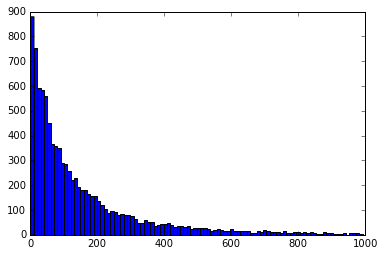

In [7]:
# Histogram
plt.hist(df.ix[df.plays < 1000, 'plays'], bins = 100)
plt.show()

* right skewed, must consider when binning
* some users could have barely used the service
 * number of listens shouldn't translate to a rating for them

In [9]:
query = 'SELECT userid, SUM(plays) as total_plays, COUNT(*) as artists_played FROM user_plays GROUP BY userid'
df_c = pd.read_sql_query(query, conn)

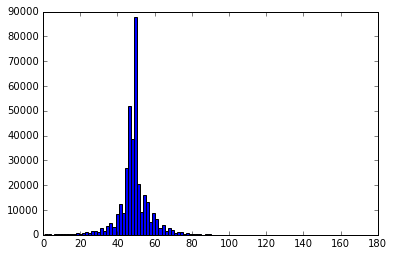

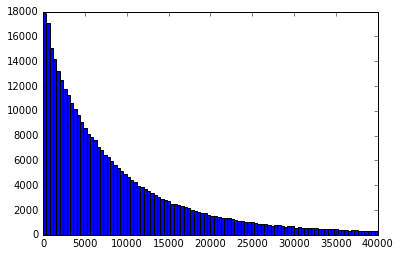

In [11]:
# Histogram
plt.hist(df_c.artists_played, bins = 100)
plt.show()

plt.hist(df_c.ix[(df_c['total_plays'] < 40000), 'total_plays'], bins = 100)
plt.show()

In [ ]:
# Get quantiles for number of artists and plays
# Get sample of users and see distribution of artist plays